<a href="https://colab.research.google.com/github/H2IA/escola-de-verao-2021/blob/main/notebooks/colab/M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

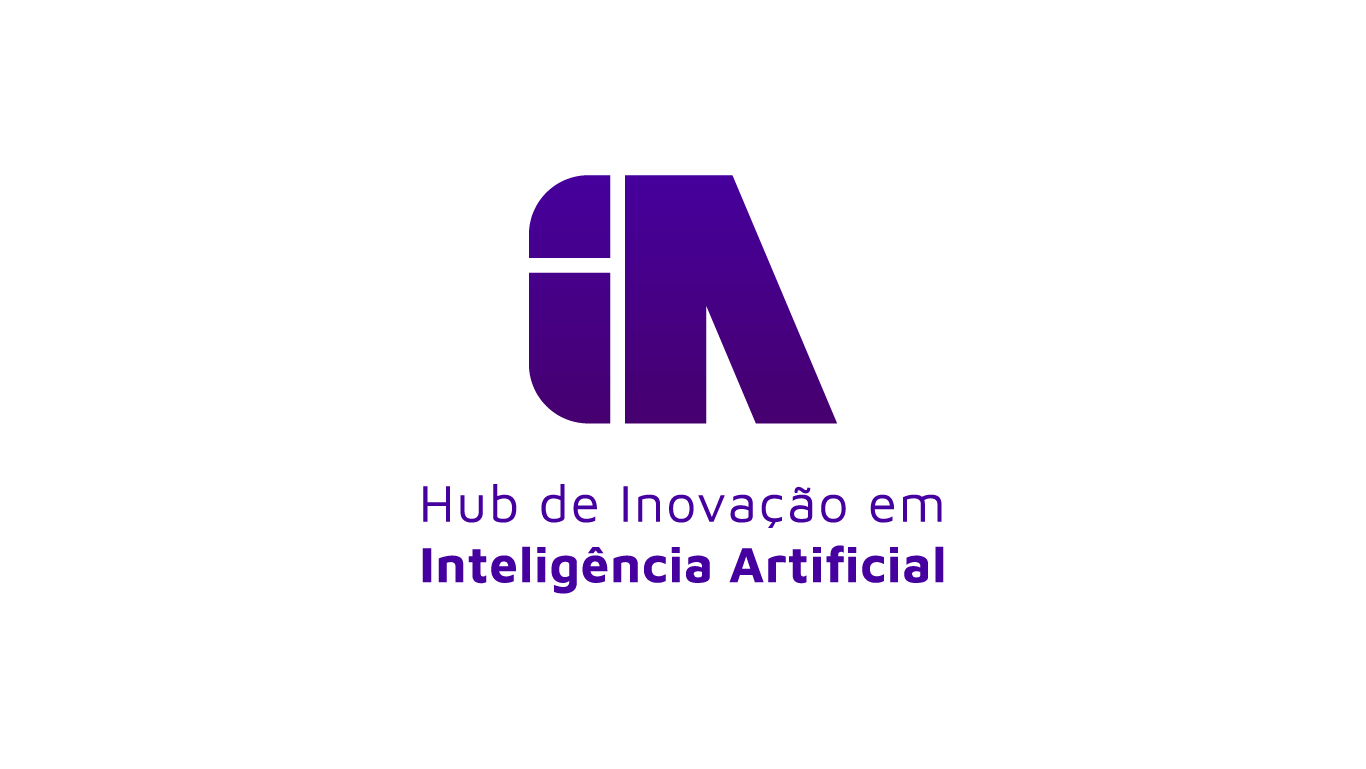


# Métricas

##Matriz de Confusão

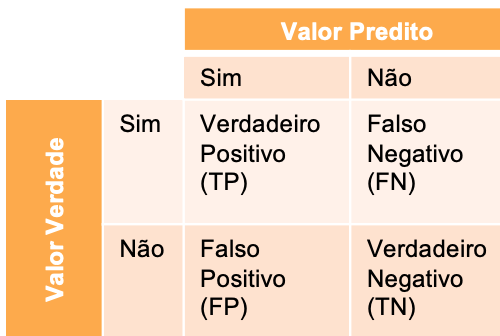

In [57]:
from sklearn.metrics import confusion_matrix

y_verdade = [2, 0, 2, 2, 0, 1]
y_predito = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_verdade, y_predito)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [58]:
y_verdade = ["gato", "cachorro", "gato", "gato", "cachorro", "peixe"]
y_predito = ["cachorro", "cachorro", "gato", "gato", "cachorro", "gato"]

confusion_matrix(y_verdade, y_predito, labels=["cachorro", "peixe", "gato"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [59]:
y_verdade = ['sim', 'sim', 'sim', 'sim', 'sim', 'sim', 'não',  'não', 'não', 'não']
y_predito = ['sim', 'sim', 'sim', 'sim', 'não',  'não',  'sim', 'não', 'não', 'não']
label_nomes = ['sim', 'não']

confusion_matrix(y_verdade, y_predito, labels=label_nomes)

#A diagonal principal corresponde às previsões corretas. Nesse caso binário, falsos positivos e falsos negativos

array([[4, 2],
       [1, 3]])

## Acurácia
A proporção de casos que foram corretamente previstos, sejam eles verdadeiro positivo ou verdadeiro negativo.

In [60]:
from sklearn.metrics import accuracy_score

y_verdade = [0, 1, 2, 0, 1, 2]
y_predito = [0, 2, 1, 0, 0, 1]

accuracy_score(y_verdade, y_predito)

0.3333333333333333

##Precisão

Precisão = TP / (TP + FP)

Qual a proporção de identificações positivas foi realmente correta?

Daqueles que classifiquei como corretos, quantos efetivamente eram?

In [61]:
from sklearn.metrics import precision_score

precision_score(y_verdade, y_predito, average=None)
#precision_score(y_verdade, y_predito, average='macro')
#precision_score(y_verdade, y_predito, average='micro')
#precision_score(y_verdade, y_predito, average='weighted')

array([0.66666667, 0.        , 0.        ])

##Revocação
Revocação = TP / (TP + FN)

Qual proporção de positivos foi identificados corretamente?

Quando realmente é da classe X, o quão frequente você classifica como X?”

In [62]:
from sklearn.metrics import recall_score

recall_score(y_verdade, y_predito, average=None)
#recall_score(y_verdade, y_predito, average='macro')
#recall_score(y_verdade, y_predito, average='micro')
#recall_score(y_verdade, y_predito, average='weighted')

array([1., 0., 0.])

##Medida-F

Medida-F = 2 * (Precisão * Revocação) / (Precisão + Revocação)

Combina precisão e revocação de modo a trazer um número único que indique a qualidade geral do seu modelo.

In [63]:
from sklearn.metrics import f1_score

f1_score(y_verdade, y_predito, average=None)
#f1_score(y_verdade, y_predito, average='macro')
#f1_score(y_verdade, y_predito, average='micro')
#f1_score(y_verdade, y_predito, average='weighted')

array([0.8, 0. , 0. ])

## Sumário de avaliação do modelo

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_verdade, y_predito))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6



<Figure size 432x288 with 0 Axes>

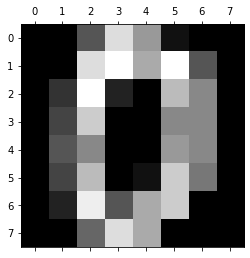

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [66]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

X, y = load_digits(return_X_y=True)
clf = Perceptron()
clf.fit(X, y)
clf.score(X, y)

#clf.score(X, y) irá verificar o número que seu modelo previu e irá comparar com o valor esperado do conjunto de treino

0.9393433500278241

In [67]:
clf

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.30)
clf = Perceptron()
clf.fit(X_treino, y_treino)
clf.score(X_treino, y_treino) 

0.9769291964996022

In [69]:
y_predito = clf.predict(X_teste)
clf.score(X_teste, y_teste) 

0.9351851851851852

In [70]:
y_predito

array([1, 8, 3, 0, 6, 9, 1, 3, 0, 6, 2, 0, 6, 9, 6, 4, 2, 1, 1, 7, 2, 4,
       9, 2, 4, 2, 7, 5, 2, 3, 0, 6, 4, 8, 6, 0, 3, 5, 0, 9, 4, 3, 9, 5,
       6, 5, 5, 9, 8, 0, 6, 1, 6, 4, 1, 2, 2, 8, 1, 5, 1, 3, 3, 6, 4, 2,
       3, 1, 7, 9, 4, 3, 8, 5, 1, 6, 7, 6, 5, 8, 7, 9, 5, 2, 9, 2, 4, 1,
       6, 4, 6, 2, 5, 9, 5, 5, 9, 0, 7, 5, 5, 3, 5, 9, 2, 6, 3, 3, 0, 1,
       2, 7, 6, 1, 1, 3, 7, 9, 2, 4, 2, 6, 5, 2, 6, 2, 1, 9, 9, 8, 1, 1,
       4, 7, 3, 5, 2, 9, 5, 0, 3, 0, 6, 3, 6, 1, 4, 5, 8, 4, 9, 9, 7, 7,
       7, 5, 9, 4, 5, 9, 8, 1, 8, 8, 6, 0, 3, 9, 5, 6, 0, 0, 5, 9, 9, 7,
       7, 7, 7, 2, 9, 4, 5, 0, 6, 1, 5, 1, 2, 3, 4, 5, 0, 1, 4, 9, 9, 5,
       1, 3, 0, 8, 0, 9, 5, 4, 0, 5, 9, 5, 1, 3, 0, 7, 8, 1, 1, 3, 1, 4,
       1, 7, 3, 8, 6, 9, 3, 5, 4, 0, 2, 7, 7, 4, 0, 1, 0, 3, 8, 5, 5, 8,
       9, 5, 6, 1, 4, 2, 6, 4, 0, 6, 4, 8, 8, 8, 8, 4, 5, 4, 2, 4, 4, 2,
       2, 2, 5, 0, 3, 2, 6, 5, 2, 3, 0, 0, 8, 8, 9, 6, 7, 9, 7, 4, 5, 0,
       9, 8, 7, 4, 6, 0, 5, 9, 7, 3, 3, 4, 7, 4, 2,

sklearn.metrics.plot_confusion_matrix(**estimator**, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)

estimator: estimator instance
**Fitted classifier** or a **fitted Pipeline** in which the last estimator is a classifier.

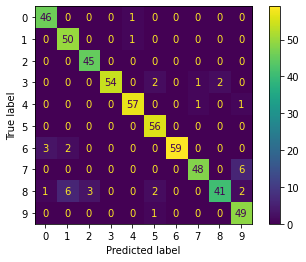

In [71]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_teste, y_teste)  
plt.show()  

Só funciona com modelos treinados no padrão do scikit-learn.

### Biblioteca scikit-plot

Recebe uma lista de valores alvo e uma lista de valores preditos e então calcula métricas de avaliação de qualidade do modelo.


*   Matriz de Confusão
*   Curva ROC
*   Curva Precisão x Revocação



In [72]:
!pip -qqq install scikit-plot

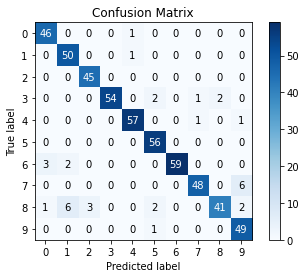

In [73]:
import scikitplot as skplt

y_predito = clf.predict(X_teste)

skplt.metrics.plot_confusion_matrix(y_teste, y_predito, normalize=False) #para qualquer modelo a partir dos dados esperados e preditos
plt.show()

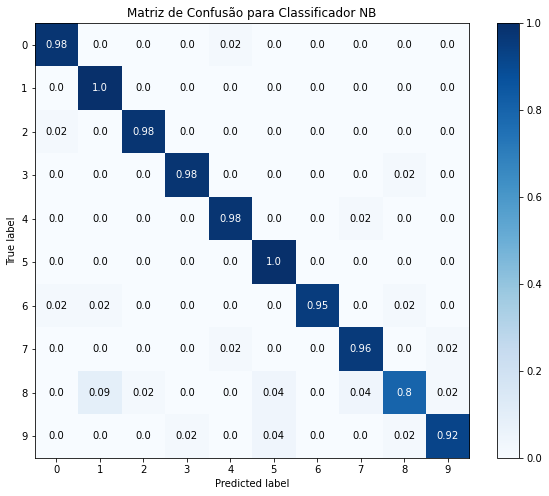

In [87]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_treino, y_treino)
y_predito = rf.predict(X_teste)

skplt.metrics.plot_confusion_matrix(
 y_teste,
 y_predito,
 normalize=True,
 title="Matriz de Confusão para Classificador NB",
 figsize=(10, 8)
)

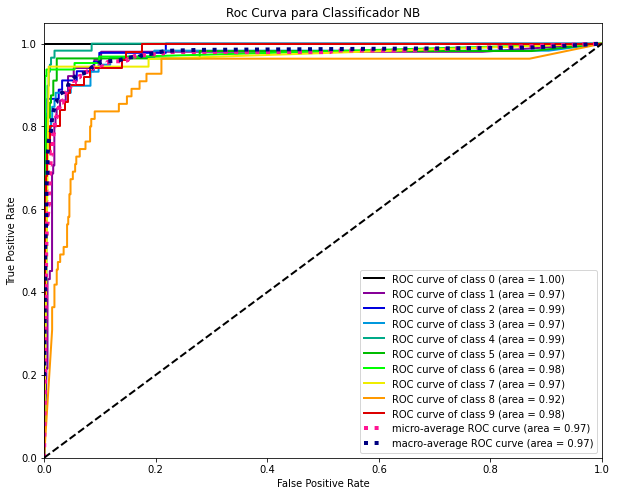

In [84]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_treino, y_treino)
y_predito = nb.predict_proba(X_teste)

skplt.metrics.plot_roc(
 y_teste, 
 y_predito, 
 title="Curva ROC para Classificador NB",
 figsize=(10, 8)
)

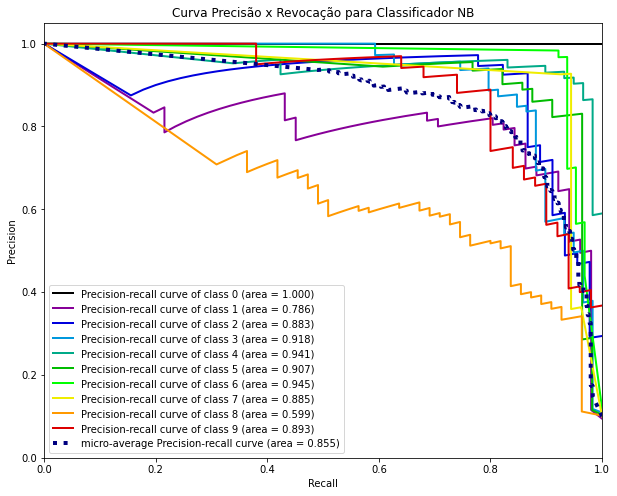

In [89]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_treino, y_treino)
y_predito = nb.predict_proba(X_teste)

skplt.metrics.plot_precision_recall(
 y_teste, 
 y_predito, 
 title="Curva Precisão x Revocação para Classificador NB",
 figsize=(10, 8)
)